# `Import & Display Size`

In [ ]:
!pip install -q lucid>=0.2.3

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray 2022.12.0 requires numpy>=1.20, but you have numpy 1.19.0 which is incompatible.
xarray-einstats 0.5.1 requires numpy>=1.20, but you have numpy 1.19.0 which is incompatible.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.19.0 which is incompatible.
opencv-python 4.7.0.72 requires numpy>=1.19.3; python_version >= "3.9", but you have numpy 1.19.0 which is incompatible.
opencv-python-headless 4.7.0.72 requires numpy>=1.19.3; python_version >= "3.9", but you have numpy 1.19.0 which is incompatible.
opencv-contrib-python 4.7.0.72 requires numpy>=1.19.3; python_version >= "3.9", but you have numpy 1.19.0 which is incompatible.
ml-dtypes 0.0.4 requires numpy>1.20, but you have numpy 1.19.0 which is incompatible.
matplotlib 3.7.1 requires numpy>=1.20, but you have numpy 1.19.0 which is incompati

In [ ]:
#IMPORT & DISPLAY-SIZE---------------------

import numpy as np
import math

import ctypes.util
from lucid.misc.gl.glcontext import create_opengl_context

import OpenGL.GL as gl
from OpenGL.GLU import *

import time
from IPython.display import display
from IPython.display import clear_output
from PIL import Image

WIDTH, HEIGHT = 800, 800
create_opengl_context((WIDTH, HEIGHT))

print(gl.glGetString(gl.GL_VERSION))
print(gl.glGetString(gl.GL_VENDOR))
#print(gl.glGetString(gl.GL_EXTENSIONS))


# Simple Stickman Platforming Game:








# `Draw Point`

In [ ]:
#NORMALIZATION-------------------------------

def addVertex(a,b):
    gl.glVertex2f(a/(WIDTH/2),b/(HEIGHT/2))


In [ ]:
#AXIS----------------------------------------

def drawAxis():
    gl.glColor3f(1, 1, 1)
    gl.glPointSize(1)
    gl.glBegin(gl.GL_LINES)

    addVertex(-WIDTH, 0)
    addVertex(WIDTH, 0)
    addVertex(0, -HEIGHT)
    addVertex(0, HEIGHT)

    gl.glEnd()


In [ ]:
#DRAW-POINT----------------------------------

def drawPoint(x,y):
    gl.glBegin(gl.GL_POINTS)

    addVertex(x,y)

    gl.glEnd()


# `Midpoint Algorithm`

In [ ]:
#MIDPOINT-ALGORITHM--------------------------

def findZone(dx,dy):
    zone = 0
    if abs(dx) >= abs(dy):

        if dx >= 0 and dy >= 0:

            pass

        if dx >= 0 and dy < 0:

            zone = 7

        if dx < 0 and dy >= 0:

            zone = 3

        if dx < 0 and dy < 0:

            zone = 4

    else:

        if dx >= 0 and dy >= 0:

            zone = 1

        if dx >= 0 and dy < 0:

            zone = 6

        if dx < 0 and dy >= 0:

            zone = 2

        if dx < 0 and dy < 0:

            zone = 5

    return zone

def convertZone(X1,Y1,zone):
    if zone == 0:

        pass

    elif zone == 1:

        X1,Y1 = Y1,X1

    elif zone == 2:

        X1,Y1 = Y1,-X1

    elif zone == 3:

        X1,Y1 = -X1,Y1

    elif zone == 4:

        X1,Y1 = -X1,-Y1

    elif zone == 5:

        X1,Y1 = -Y1,-X1

    elif zone == 6:

        X1,Y1 = -Y1,X1

    elif zone == 7:

        X1,Y1 = X1,-Y1

    return X1,Y1

def originZone(X1,Y1,zone):
    if zone == 0:

        pass

    elif zone == 1:

        X1,Y1 = Y1,X1

    elif zone == 2:

        X1,Y1 = -Y1,X1

    elif zone == 3:

        X1,Y1 = -X1,Y1

    elif zone == 4:

        X1,Y1 = -X1,-Y1

    elif zone == 5:

        X1,Y1 = -Y1,-X1

    elif zone == 6:

        X1,Y1 = Y1,-X1

    elif zone == 7:

        X1,Y1 = X1,-Y1

    return X1,Y1

def midPoint(X1,Y1,X2,Y2):
    dx = X2 - X1
    dy = Y2 - Y1
    zone = findZone(dx,dy)
    drawPoint(X1,Y1)
    X1,Y1 = convertZone(X1,Y1,zone)
    X2,Y2 = convertZone(X2,Y2,zone)
    d = 2*dy - dx
    x = X1
    y = Y1
    while x < X2:

        x = x + 1
        if d < 0:

            d = d + dy

        else:

            d = d + dy - dx
            y = y + 1

        x_p,y_p = originZone(x,y,zone)
        drawPoint(x_p,y_p)


# `Midpoint Circle Algorithm`




In [ ]:
#MIDPOINT-CIRCLE ALGORITHM-------------------

def midpointCircle(r, X=0, Y=0):
    d = 1 - r
    x = 0
    y = r
    circlePoints(x, y, X, Y)
    while x < y:
        if d >= 0:  # Move South-East
            d += 2 * x - 2 * y + 5
            x += 1
            y -= 1
        else:  # Move East
            d += 2 * x + 3
            x += 1
        circlePoints(x, y, X, Y)


def circlePoints(x, y, X, Y):
    drawPoint(x + X, y + Y)
    drawPoint(y + X, x + Y)
    drawPoint(y + X, -x + Y)
    drawPoint(x + X, -y + Y)
    drawPoint(-x + X, -y + Y)
    drawPoint(-y + X, -x + Y)
    drawPoint(-y + X, x + Y)
    drawPoint(-x + X, y + Y)


# `Transformation`




In [ ]:
#TRANSFORMATION------------------------------

def translate(m, tx=0, ty=0): # tx translate in x-axis; ty translate on y-axis
    t = np.array([[1, 0, tx],
                  [0, 1, ty],
                  [0, 0, 1]])

    return np.matmul(t, m)

def reflect(m, rx=1, ry=1): # rx = -1, reflection on x axis; ry = -1, reflection on y axis
    rl = np.array([[ry, 0, 0],
                   [0, rx, 0],
                   [0, 0, 1]])

    return np.matmul(rl, m)

def rotate(m, degree):  # anti-clockwise direction taken as +ve
    theta = math.radians(degree)
    a, b = math.cos(theta), math.sin(theta)
    r = np.array([[a, -b, 0],
                  [b, a, 0],
                  [0, 0, 1]])

    return np.matmul(r, m)


# `Map & Power-up`

In [ ]:
#POWER-UP-----------------------------------------

power_location = []
def power_up(x1, y1, x2, y2):
  gl.glColor3f(0.990, 0.940, 0.0115)
  gl.glPointSize(2)

  m1 = [[x1],
        [y1],
        [1]]

  m2 = [[x2],
        [y2],
        [1]]

  dx = abs(((x2 - x1) / 2) - 10) # Cube-Size = 20
  location = [x1 + dx, x2 - dx, y1]
  if location not in power_location:

    power_location.append(location)

  m11, m22 = translate(m1, dx, 20), translate(m2, -dx, 20)
  midPoint(m11[0][0], m11[1][0], m22[0][0], m22[1][0]) # Bottom

  dy = abs(m11[0][0] - m22[0][0])
  m11a, m22a = translate(m11, 0, dy), translate(m22, 0, dy)
  midPoint(m11a[0][0], m11a[1][0], m22a[0][0], m22a[1][0]) # Top

  m11b, m22b = rotate(m11a, -90), rotate(m22a, -90) # Rotate Top 90 Degree Clockwise

  dx1, dx2 = -(m11b[0][0] - m22a[0][0]), -(m22b[0][0] - m22[0][0])
  dy1, dy2 = -(m11b[1][0] - m11a[1][0]), -(m22b[1][0] - m22[1][0])

  m11b, m22b = translate(m11b, dx1, dy1), translate(m22b, dx1, dy2)
  midPoint(m11b[0][0], m11b[1][0], m22b[0][0], m22b[1][0]) # Right

  m11c, m22c = translate(m11b, -abs(m22a[0][0] - m11a[0][0]), 0), translate(m22b, -abs(m22[0][0] - m11[0][0]), 0)
  midPoint(m11c[0][0], m11c[1][0], m22c[0][0], m22c[1][0]) # Left



In [ ]:
#MAP-----------------------------------------

def map():
  gl.glPointSize(3.5)

  # Level 1:
  gl.glColor3f(1, 0, 0.950)

  midPoint(-160, -300, 160, -300)

  # Level 2:
  gl.glColor3f(0.870, 0, 1)

  midPoint(-280, -200, -160, -200)
  midPoint(-60, -200, 60, -200) # Power-Up Platform
  midPoint(160, -200, 280, -200)

  # Level 3:
  gl.glColor3f(0.720, 0, 1)

  midPoint(160, -100, 280, -100)
  midPoint(-240, -100, -120, -100) # Power-Up Platform

  #Level 4:
  gl.glColor3f(0.470, 0, 1)

  midPoint(160, 0, 280, 0)
  midPoint(-60, 0, 60, 0)
  midPoint(-280, 0, -160, 0)

  #Level 5:
  gl.glColor3f(0.0200, 0, 1)

  midPoint(-240, 100, -40, 100)
  midPoint(40, 100, 240, 100) # Power-up Platform

  #Level 6:
  gl.glColor3f(0, 0.440, 1)

  midPoint(160, 200, 280, 200)
  midPoint(-60, 200, 60, 200)
  midPoint(-280, 200, -160, 200)

  #Level 7:
  gl.glColor3f(0, 0.620, 1)

  midPoint(-160, 300, 160, 300)

  power_up(-60, -200, 60, -200)
  power_up(-240, -100, -120, -100)
  power_up(40, 100, 240, 100)


# `Stickman`



In [ ]:
#STICKMAN-------------------------------------

def stickman(x, y):
  gl.glColor3f(1, 1, 1)
  gl.glPointSize(1)

  # m1 = [[x],
  #       [y],
  #       [1]]

  # Left Leg--------
  midPoint(x, y, x + 20, y + 20)

  # m2 = translate(m1, 20, 20)
  # midPoint(m1[0][0], m1[1][0], m2[0][0], m2[1][0])

  # Right Leg-------
  midPoint(x + 40, y, x + 20, y + 20)

  # m11, m22 = reflect(m1, 1, -1), reflect(m2, 1, -1) # Reflect Left Leg on y-axis to give Right Leg
  # dx = -(m22[0][0] - m2[0][0])
  # m11, m22 = translate(m11, dx, 0), translate(m22, dx, 0)
  # midPoint(m11[0][0], m11[1][0], m22[0][0], m22[1][0])

  # Body------
  midPoint(x + 20, y + 70, x + 20, y + 20)

  # m3 = translate(m1, 20, 70)
  # midPoint(m3[0][0], m3[1][0], m2[0][0], m2[1][0])

  # Left Hand--------
  midPoint(x, y + 50, x + 20, y + 60)

  # m11a, m22a = translate(m1, 0, 50), translate(m2, 0, 50) # Shift Leg Leg to give Left Hand
  # midPoint(m11a[0][0], m11a[1][0], m22a[0][0], m22a[1][0])

  # Right Hand-------
  midPoint(x + 40, y + 50, x + 20, y + 60)

  # m11b, m22b = translate(m11, 0, 50), translate(m22, 0, 50) # Shift Right Leg to give Right Hand
  # midPoint(m11b[0][0], m11b[1][0], m22b[0][0], m22b[1][0])

  # Head--------
  midpointCircle(7, x + 20, y + 80)

  # m3 = translate(m1, 20, 80)
  # midpointCircle(7, m3[0][0], m3[1][0])


# `Render Display`

In [ ]:
#SHOW-RENDER-----------------------------------

def showRender():
  img_buf = gl.glReadPixelsub(0, 0, WIDTH, HEIGHT, gl.GL_RGB, gl.GL_UNSIGNED_BYTE)
  img = np.frombuffer(img_buf,np.uint8).reshape(HEIGHT, WIDTH, 3)[::-1]
  display(Image.fromarray(img,'RGB'))
  gl.glClear(gl.GL_COLOR_BUFFER_BIT)

  time.sleep(0.025)
  clear_output(wait=True)

# drawAxis
# map()
# stickman(0, -300)
# showRender()


# `Game`


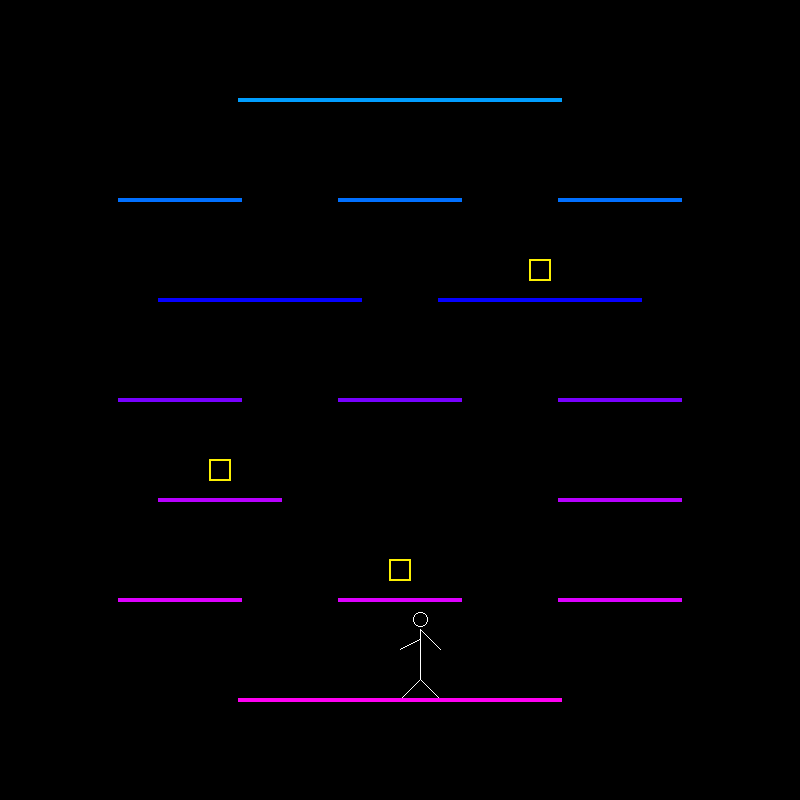

In [ ]:
#PLAY-GAME-------------------------------------

def play(x=0, y=-300):

  # drawAxis()
  stickman(x, y)
  map()
  showRender()

  move = ['w', 's', 'd', 'a', 'wd', 'wa', 'sd', 'sa']
  while True:

    i = input('W/A/S/D: ').lower()

    if i == move[0]:

      y += 100

    elif i == move[1]:

      y -= 100

    elif i == move[2]:

      x += 40

    elif i == move[3]:

      x -= 40

    elif i == move[4]:

      x += 80
      y += 100

    elif i == move[5]:

      x -= 80
      y += 100

    elif i == move[6]:

      x += 80
      y -= 100

    elif i == move[7]:

      x -= 80
      y -= 100

    elif i not in move:

      print('Unrecognized Character(s)')

    # Power-up Platform------------------------

    for p in power_location:

      if y == p[2]:
        if x >= p[0] - 20 and x<= p[1] + 20:

          # print('Woohoo!')
          y += 200

    #------------------------------------------

    if y == 300: # Level 7
      if x >= -160 and x<= 160:

        print('Welcome to Heaven!')
        break

      else:

        y -= 100

    if y == 200: # Level 6
      if x >= 160 and x<= 280 - 40 or x >= -60 and x <= 60 - 40 or x >= -280 and x <= -160 - 40:

        pass

      else:

        y -= 100

    if y == 100: # Level 5
      if x >= -240 and x <= -40 - 40 or x >= 40 and x<= 240 - 40:

        pass

      else:

        y -= 100

    if y == 0: # Level 4
      if x >= 160 and x<= 280 - 40 or x >= -60 and x <= 60 - 40 or x >= -280 and x <= -160 - 40:

        pass

      else:

        y -= 100

    if y == -100: # Level 3
      if x >= -240 and x<= -120 - 40 or x >= 160 and x <= 280 - 40:

        pass

      else:

        y -= 100

    if y == -200: # Level 2
      if x >= -280 and x<= -160 - 40 or x >= -60 and x <= 60 - 40 or x >= 160 and x <= 280 - 40:

        pass

      else:

       y -= 100

    if y == -300: # Level 1
      if x >= -160 and x <= 160 - 40:

        pass

      else:

        print('Welcome to LIMBO')
        break

    if y == -400: # Level 0

      print('Welcome to LIMBO')
      break

    stickman(x, y)
    map()
    # print(x,y)
    showRender()

play()
